Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ recipes      1.3.0
✔ dials        1.4.0     ✔ rsample      1.3.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 10, 1, 3, 8, 1, 13, 5, 3, 6, 4, …
$ Glucose                  <dbl> 85, 89, 116, 115, 139, 103, 126, 99, 97, 145,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 80, 30, 88, 84, 66, 82, 92, 58…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 15, 19, 0, 11, 0,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 140, 110, 0, 54, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 1.441, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 57, 33, 27, 50, 22, 57, 38, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The outcome variable for this dataset is the variable titled "Outcome" which says if the patient has diabetes or not.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |   Plasma glucose concentration a 2 hours in an oral glucose tolerance test          |
| BMI         |   Body mass index (weight in kg/(height in m)^2)  |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

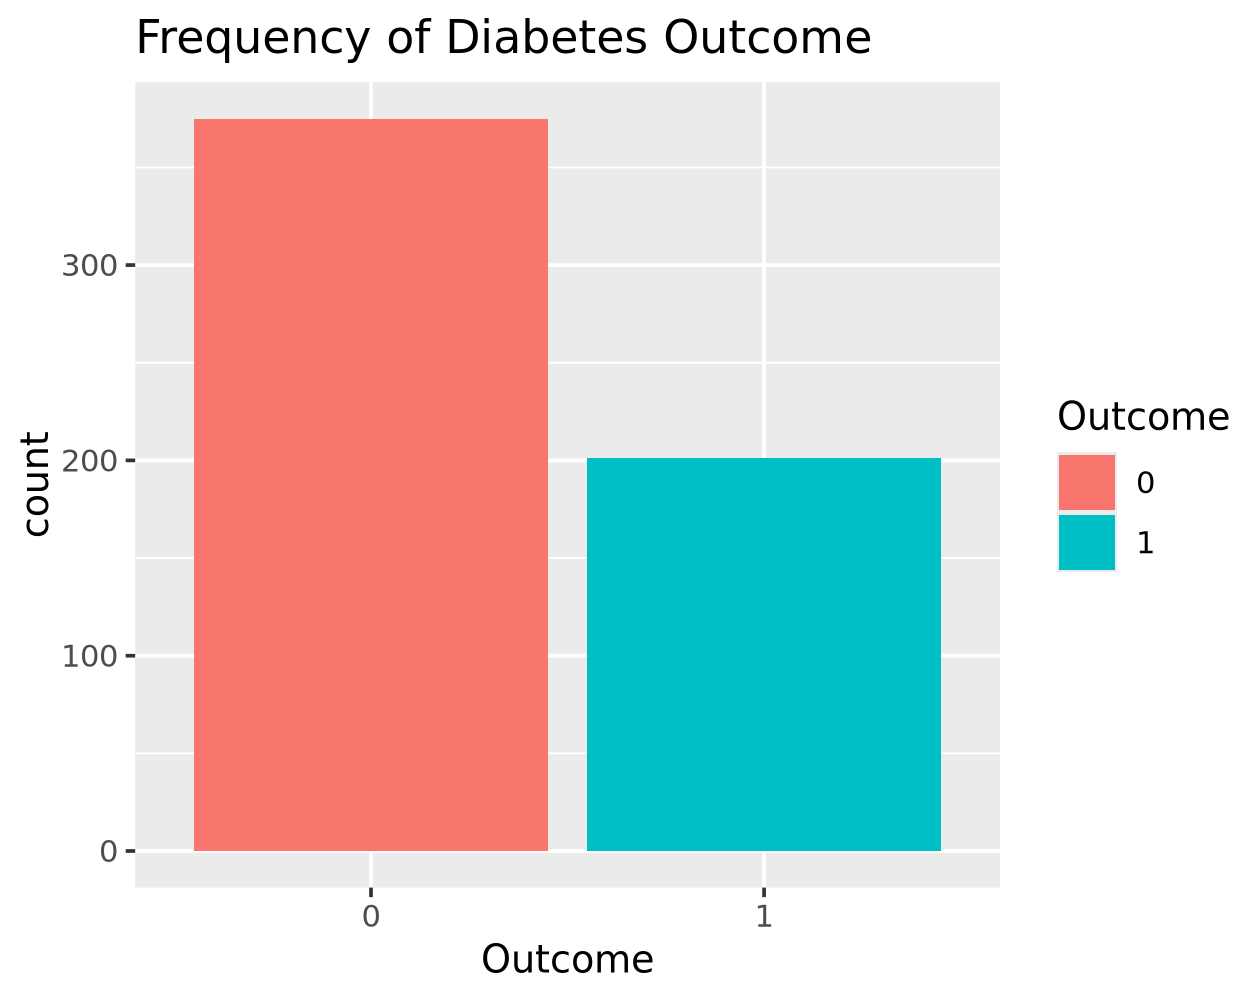

In [7]:
ggplot(diabetes_train, aes(x=Outcome, fill = Outcome)) + 
    geom_bar() +
    labs(title = 'Frequency of Diabetes Outcome', 
         x = 'Outcome') 

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the data is not balanced. For Outcome of 1, which I think is "has diabetes", that has a count almost half that of Outcome of 0.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [11]:
str(diabetes_train)

tibble [576 × 9] (S3: tbl_df/tbl/data.frame)
 $ Pregnancies             : num [1:576] 1 1 5 10 10 1 3 8 1 13 ...
 $ Glucose                 : num [1:576] 85 89 116 115 139 103 126 99 97 145 ...
 $ BloodPressure           : num [1:576] 66 66 74 0 80 30 88 84 66 82 ...
 $ SkinThickness           : num [1:576] 29 23 0 0 0 38 41 0 15 19 ...
 $ Insulin                 : num [1:576] 0 94 0 0 0 83 235 0 140 110 ...
 $ BMI                     : num [1:576] 26.6 28.1 25.6 35.3 27.1 43.3 39.3 35.4 23.2 22.2 ...
 $ DiabetesPedigreeFunction: num [1:576] 0.351 0.167 0.201 0.134 1.441 ...
 $ Age                     : num [1:576] 31 21 30 29 57 33 27 50 22 57 ...
 $ Outcome                 : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [12]:
summary(diabetes_train)

  Pregnancies        Glucose      BloodPressure    SkinThickness 
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.0  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.0  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.0  
 Mean   : 3.778   Mean   :121.0   Mean   : 69.04   Mean   :20.9  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:33.0  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.0  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:27.40   1st Qu.:0.2477           1st Qu.:24.00  
 Median : 42.50   Median :32.20   Median :0.3920           Median :29.00  
 Mean   : 83.24   Mean   :32.11   Mean   :0.4825           Mean   :32.98  
 3rd Qu.:130.00   3rd Qu.:36.80   3rd Qu.:0.6462           3rd Qu.:39.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:3

In [4]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

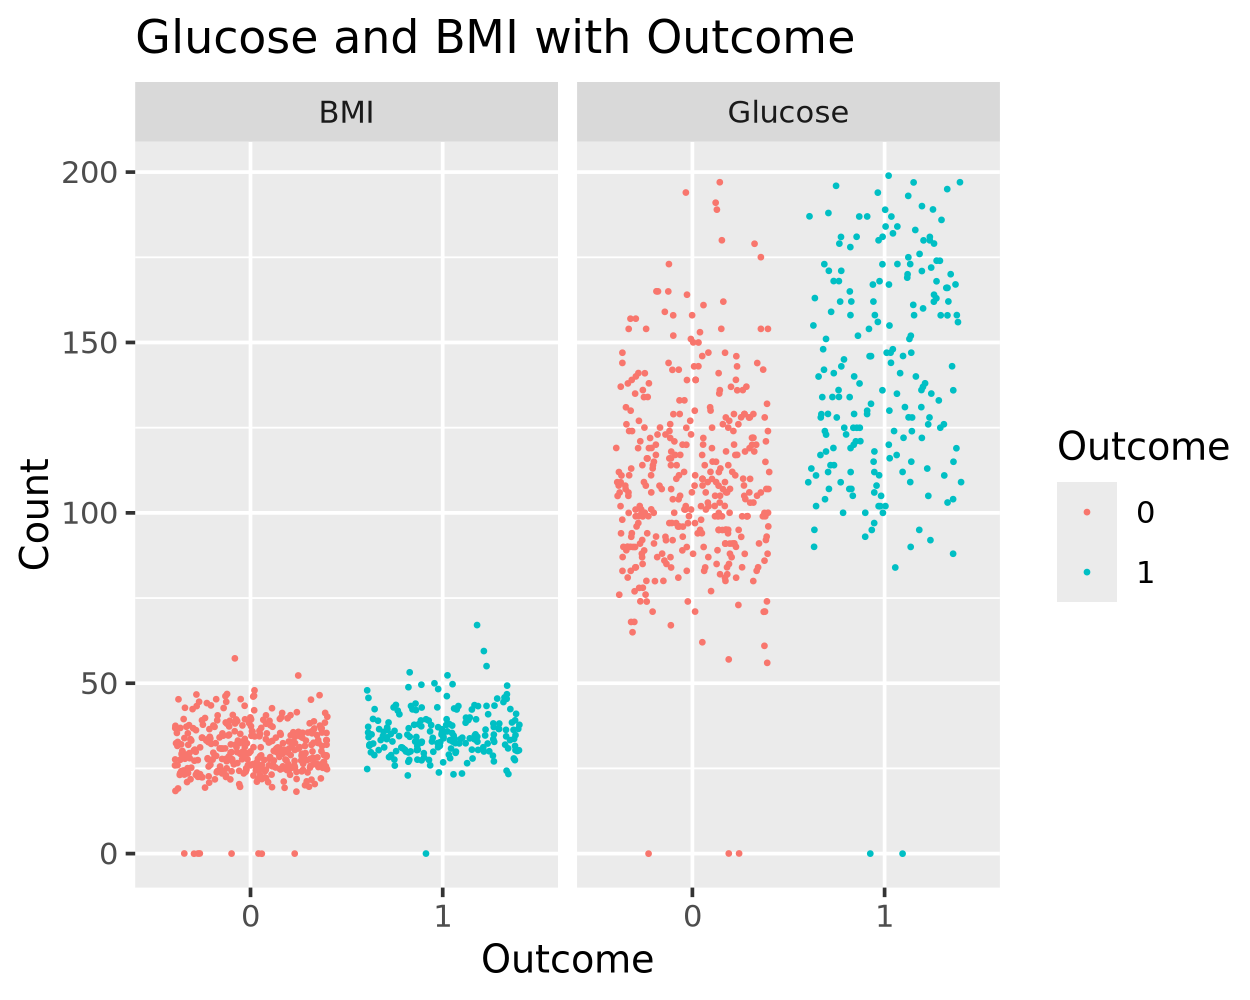

In [9]:
ggplot(plot_df, aes(x=Outcome, y=value, color = Outcome)) + 
    geom_jitter(size = 0.25) +
    facet_wrap(~name, ncol = 2, scales = 'free_x') + 
    labs(title = 'Glucose and BMI with Outcome', 
         x = 'Outcome', 
        y = 'Count') 

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

To be honest, I don't exaclty know what happens when you remove this argument. But looking at both graphs, with and without scales='free_x', the location of some points are different. For example, with scales='free_x', for Outcome=0 for glucose, the points 150 to 200 are positioned a little more towards the right than the graph without scales='free_x'. 

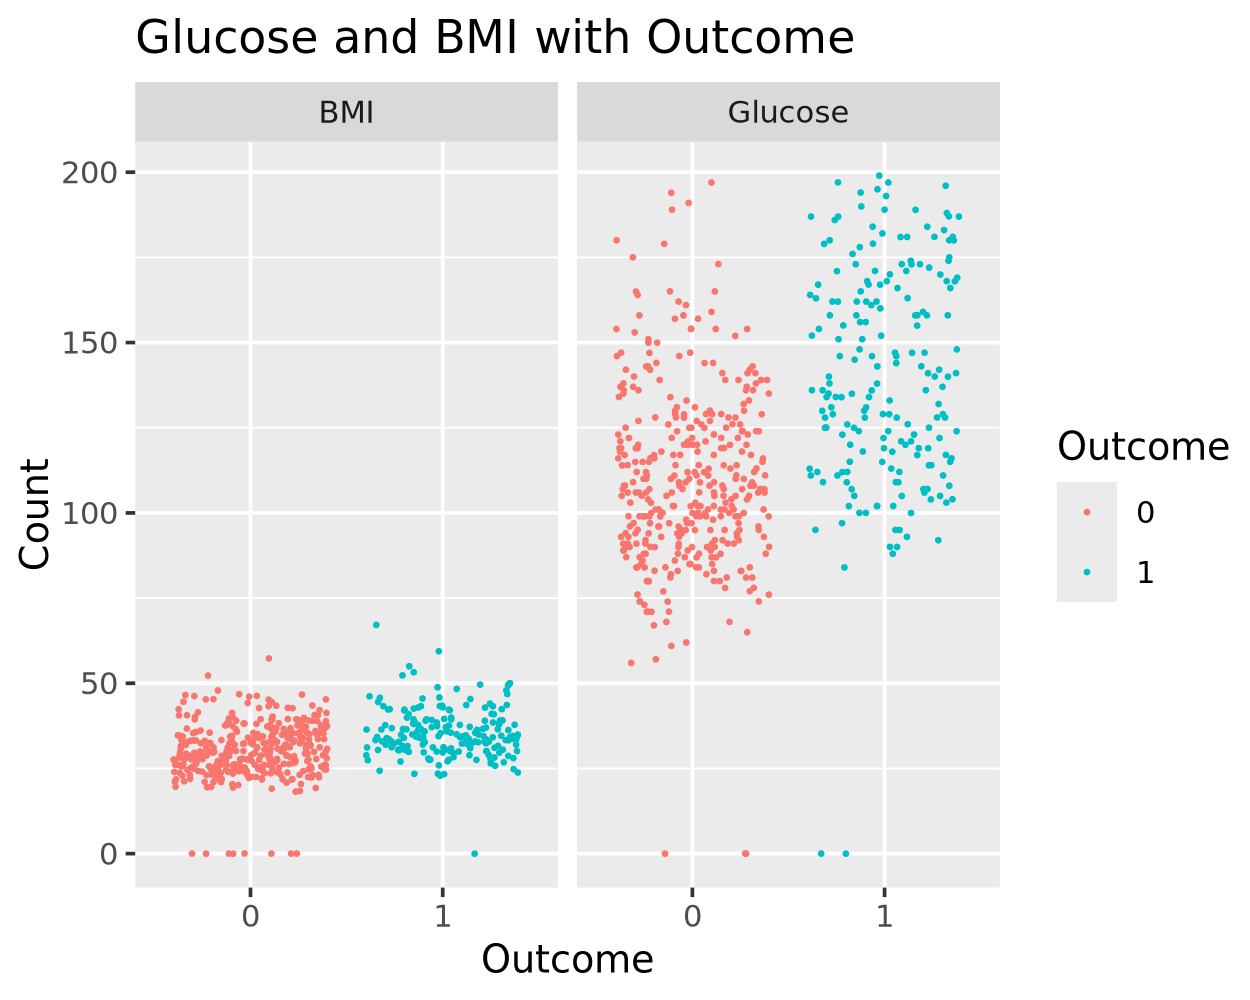

In [10]:
ggplot(plot_df, aes(x=Outcome, y=value, color = Outcome)) + 
    geom_jitter(size = 0.25) +
    facet_wrap(~name, ncol = 2) + 
    labs(title = 'Glucose and BMI with Outcome', 
         x = 'Outcome', 
        y = 'Count') 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [12]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train)

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



In [13]:
rec_prepped = prep(rec, diabetes_train)

rec_prepped |> juice() |> head()

BMI,Glucose,Outcome
<dbl>,<dbl>,<fct>
26.6,85,0
28.1,89,0
25.6,116,0
35.3,115,0
37.6,110,0
27.1,139,0


In [16]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, juice(rec_prepped))

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.45564791,0.689444583,-10.813992,2.955248e-27
BMI,0.08025906,0.015136253,5.302439,1.142657e-07
Glucose,0.03373740,0.003740377,9.019786,1.884570e-19


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [19]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.3485221,0.65147793,0,137,40,35,168,43.1,2.288,33,1
0,0.9118230,0.08817702,3,78,50,32,88,31.0,0.248,26,1
1,0.1626663,0.83733374,2,197,70,45,543,30.5,0.158,53,1
0,0.9622567,0.03774333,8,125,96,0,0,0.0,0.232,54,1
1,0.2080831,0.79191695,1,189,60,23,846,30.1,0.398,59,1
0,0.6897355,0.31026452,1,115,70,30,96,34.6,0.529,32,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [20]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 111  28
         1  14  39

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

How many individuals had diabetes in your test data?
>67

Of those that actually had diabetes, how many were predicted to have diabetes by your model?
>39 predicted out of 67 that actually had diabetes.

How many individuals predicted to have diabetes did not have diabetes?
>14 predicted to have diabetes that actually did not.